In [ ]:
import numpy as np 
import pandas as pd 

column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df = pd.read_csv('housing.csv', header=None, delimiter=r"\s+", names=column_names)
print(df.head())
print(df.shape)
print(df.describe())
df.size

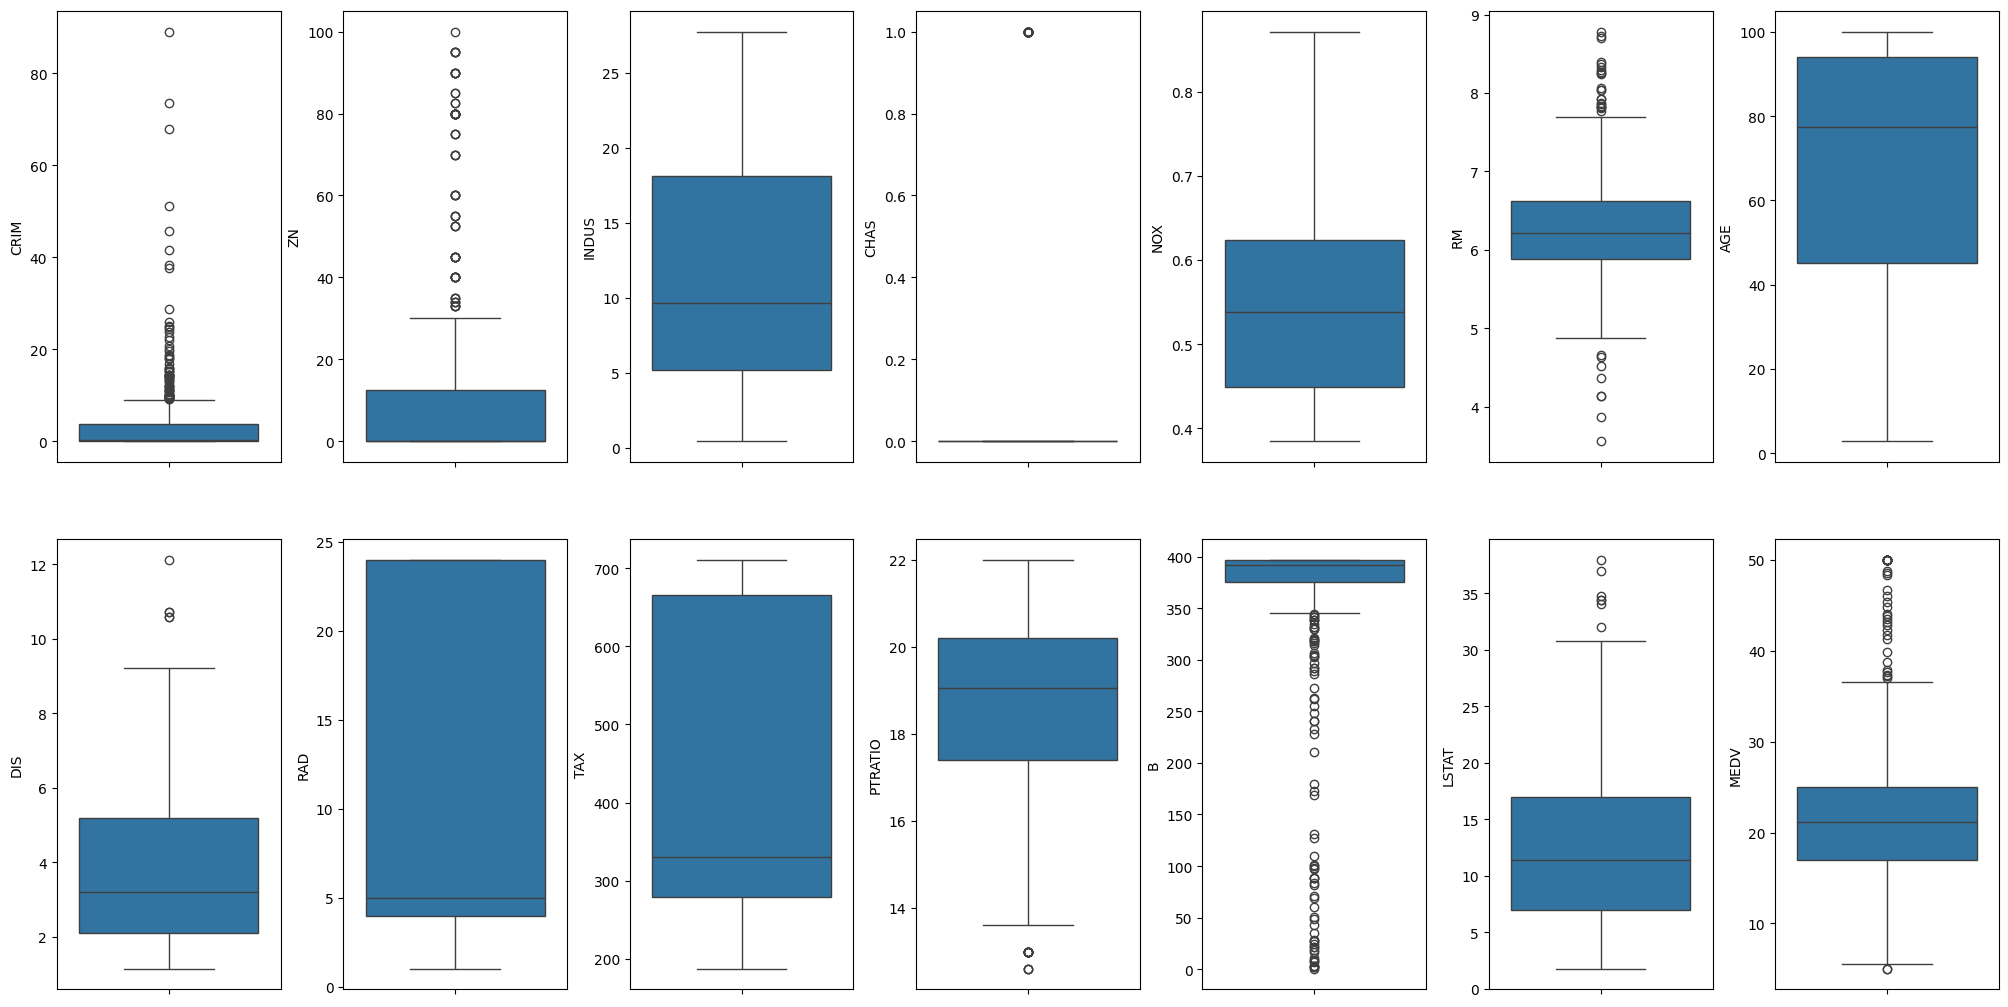

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in df.items():
    sns.boxplot(y=k, data=df, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

In [ ]:
for k, v in df.items():
  q1 = v.quantile(0.25)
  q3 = v.quantile(0.75)
  iqr = q3 - q1
  v_col = v[(v <= q1 - 1.5 * iqr) | (v >= q3 + 1.5 * iqr)]
  perc = np.shape(v_col)[0] * 100.0 / np.shape(df)[0]
  print("Column %s outliers = %.2f%%" % (k, perc))

(490, 14)


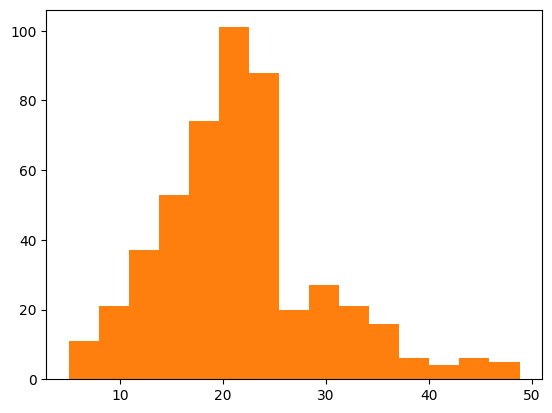

In [17]:
df = df[~(df['MEDV'] >= 50.0)]
print(np.shape(df))
plt.hist(df['MEDV'], bins=15);

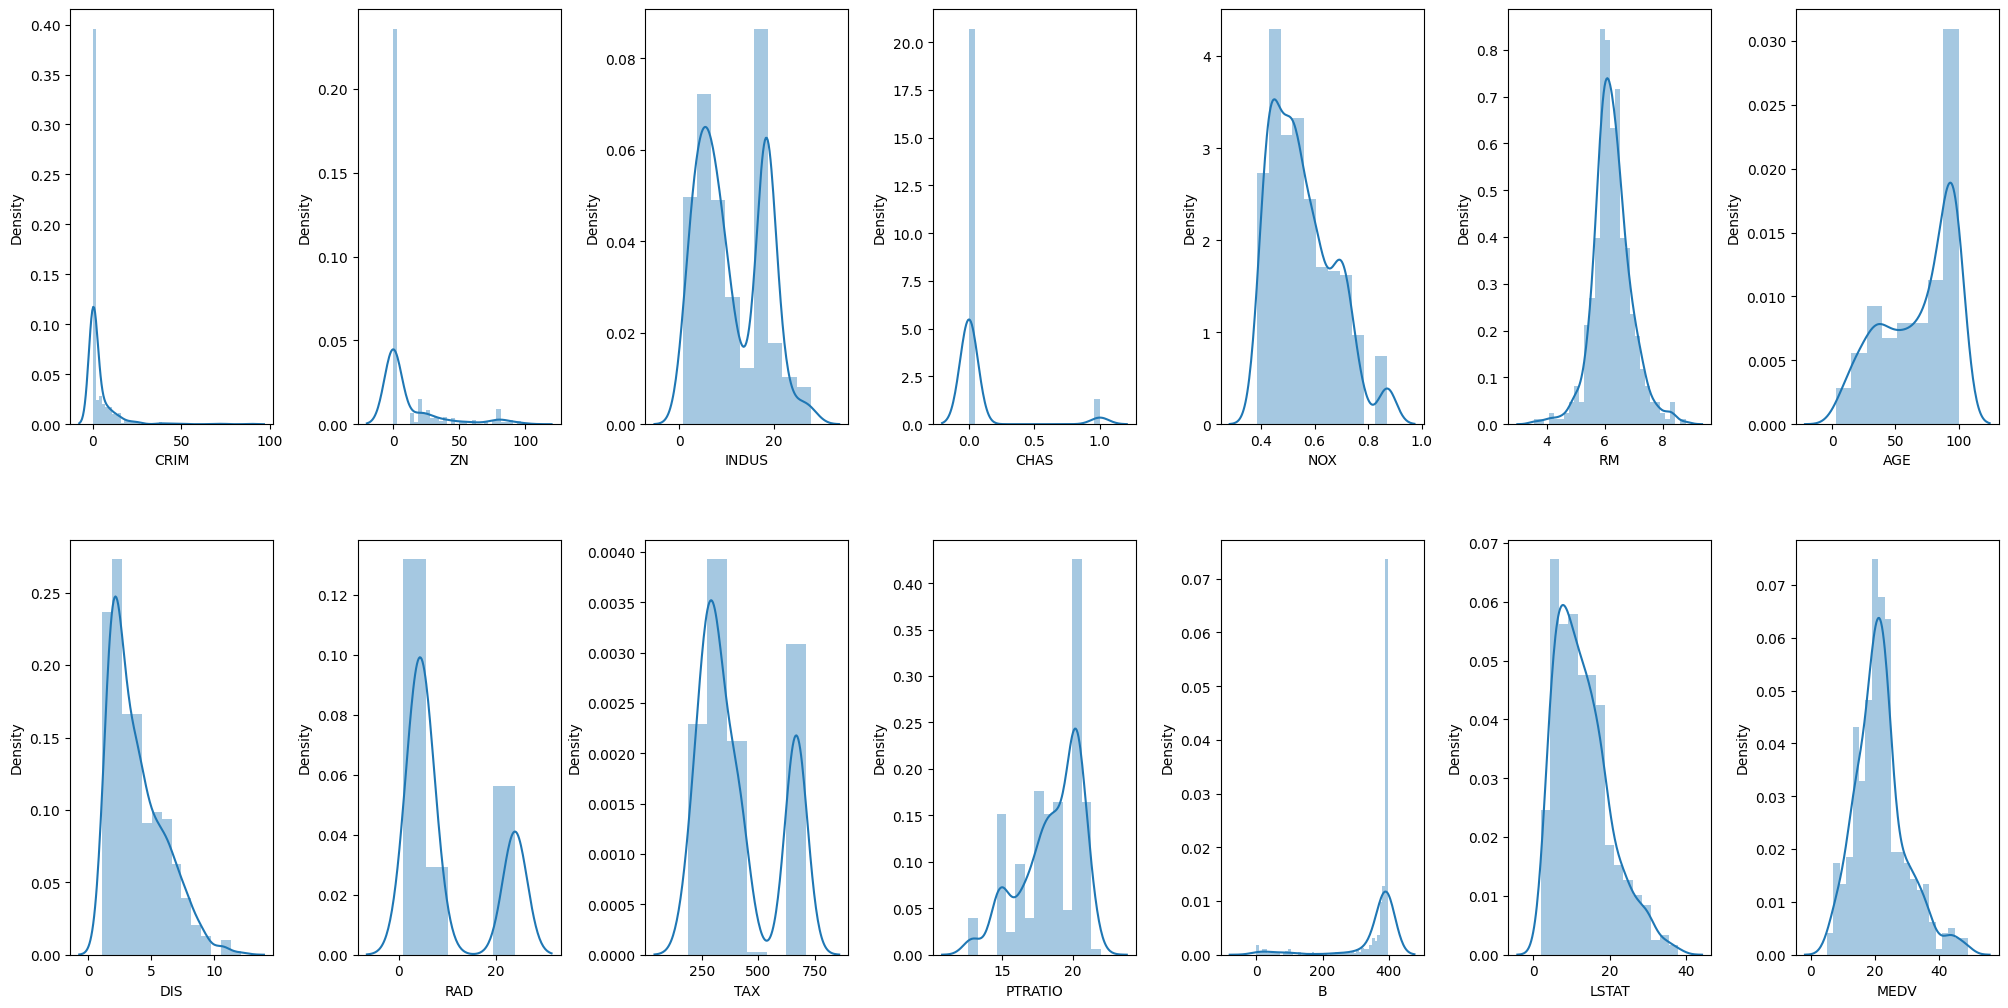

In [19]:
import warnings
warnings.filterwarnings("ignore")
fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
# distplot = distribution plot
for k,v in df.items():
    sns.distplot(v, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

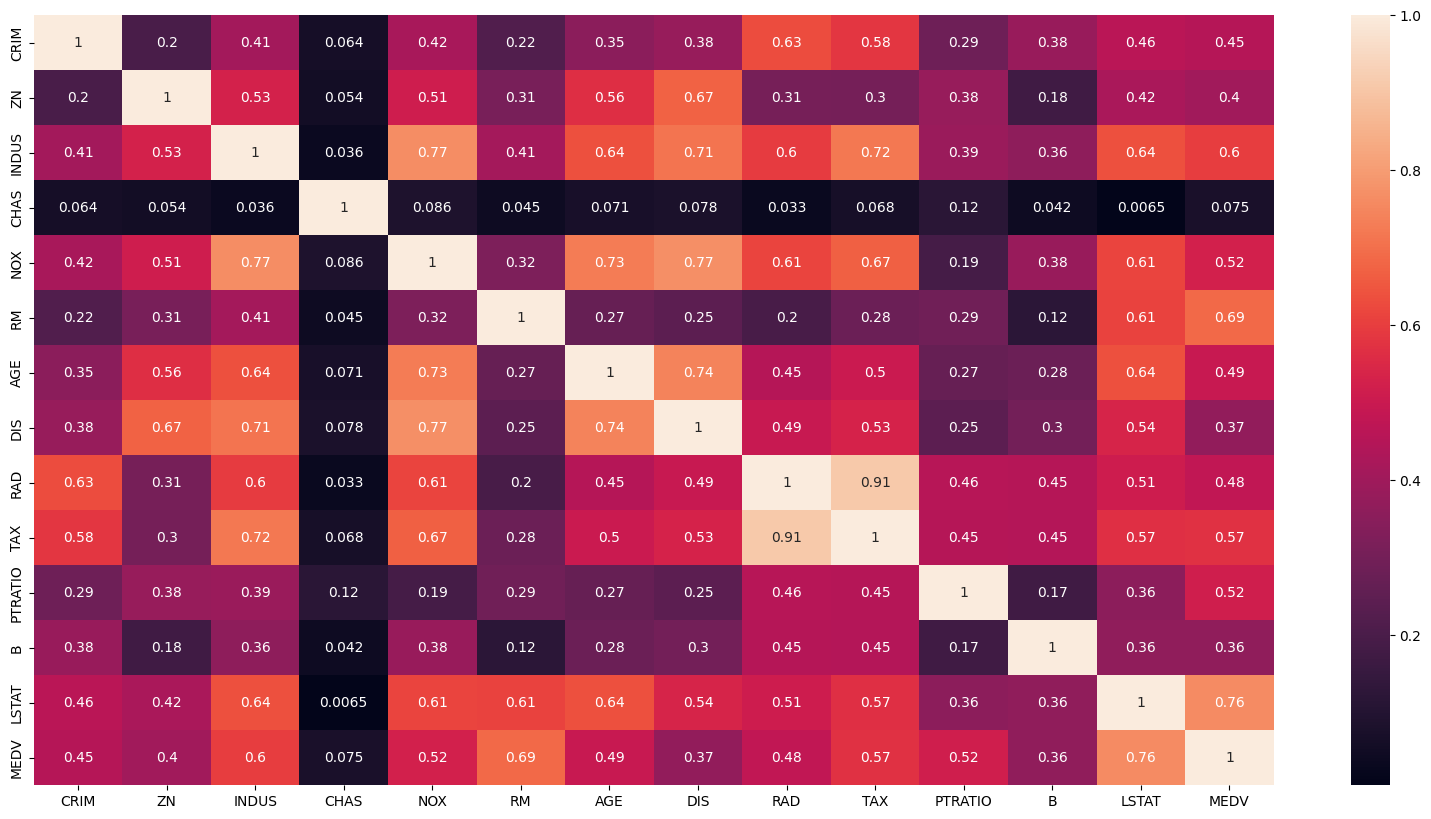

In [20]:
plt.figure(figsize=(20, 10))
sns.heatmap(df.corr().abs(),  annot=True);